In [7]:
import time
import numpy as np
import pandas as pd
import itertools as it
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, precision_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt

from sklearn.manifold import TSNE

import plotly.graph_objects as go

standarscaler = StandardScaler()

from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
Data = pd.read_csv('https://raw.githubusercontent.com/mcuscagua/Aprendizaje_Automatico/master/Trabajo_2/Data.csv')
Data = Data.set_index('Date')
Y = Data['Class']
X = Data.drop('Class', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train_Stand = standarscaler.fit_transform(X_train)
X_test_Stand = standarscaler.transform(X_test)

In [15]:
start_time = time.time()

MLPC = MLPClassifier(random_state=0)

MLPP = MLPClassifier(random_state=0)

MLPC.fit(X_train_Stand, Y_train)
y_score = MLPC.predict_proba(X_test_Stand)
y_pred = MLPC.predict(X_test_Stand)

train_sizes, train_scores, test_scores = learning_curve(MLPP, X, Y)

AUC = roc_auc_score(Y_test, y_pred)
ACC = accuracy_score(Y_test, y_pred)

elapsed_time = time.time() - start_time

print('AUC Score:')
print(AUC)
print('Accuracy Score:')
print(ACC)

AUC Score:
0.6034469343292872
Accuracy Score:
0.6030534351145038


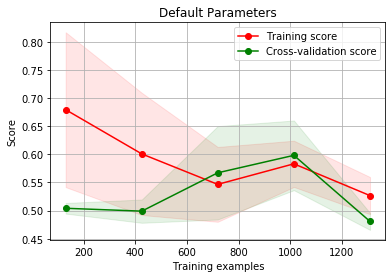

In [14]:
plt.figure()
plt.title('Default Parameters')
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

plt.show()

# Dim Reduction

In [21]:
T = TSNE(n_components=3).fit_transform(X)
X = pd.DataFrame(T)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train_Stand = standarscaler.fit_transform(X_train)
X_test_Stand = standarscaler.transform(X_test)

In [22]:
start_time = time.time()

MLPC = MLPClassifier(random_state=0)

MLPP = MLPClassifier(random_state=0)

MLPC.fit(X_train_Stand, Y_train)
y_score = MLPC.predict_proba(X_test_Stand)
y_pred = MLPC.predict(X_test_Stand)

train_sizes, train_scores, test_scores = learning_curve(MLPP, X, Y)

AUC = roc_auc_score(Y_test, y_pred)
ACC = accuracy_score(Y_test, y_pred)

elapsed_time = time.time() - start_time

print('AUC Score:')
print(AUC)
print('Accuracy Score:')
print(ACC)

AUC Score:
0.5822450248756219
Accuracy Score:
0.5826972010178118


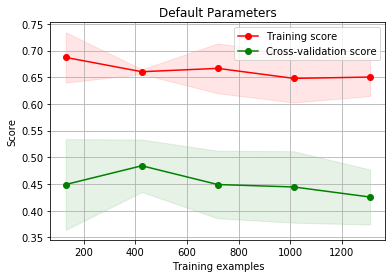

In [23]:
plt.figure()
plt.title('Default Parameters')
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

plt.show()